# World Wide Products Inc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [2]:
df=pd.read_csv("../data/historicalProductDemand.csv",infer_datetime_format = True)
df.head(10)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
5,Product_0979,Whse_J,Category_028,2012/4/19,500
6,Product_0979,Whse_J,Category_028,2012/6/5,500
7,Product_0979,Whse_J,Category_028,2012/6/27,500
8,Product_0979,Whse_J,Category_028,2012/7/23,500
9,Product_0979,Whse_J,Category_028,2012/8/29,500


# Clean Dataset:

In [3]:
df.dropna(inplace=True)

## Chosing a Product:

In [4]:
df['freq'] = df.groupby('Product_Code')['Product_Code'].transform('count')
df.head(10)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,freq
0,Product_0993,Whse_J,Category_028,2012/7/27,100,312
1,Product_0979,Whse_J,Category_028,2012/1/19,500,3889
2,Product_0979,Whse_J,Category_028,2012/2/3,500,3889
3,Product_0979,Whse_J,Category_028,2012/2/9,500,3889
4,Product_0979,Whse_J,Category_028,2012/3/2,500,3889
5,Product_0979,Whse_J,Category_028,2012/4/19,500,3889
6,Product_0979,Whse_J,Category_028,2012/6/5,500,3889
7,Product_0979,Whse_J,Category_028,2012/6/27,500,3889
8,Product_0979,Whse_J,Category_028,2012/7/23,500,3889
9,Product_0979,Whse_J,Category_028,2012/8/29,500,3889


In [5]:
print(df.sort_values(by='freq',ascending=False).head(1))

        Product_Code Warehouse Product_Category      Date Order_Demand   freq
261017  Product_1359    Whse_J     Category_019  2013/6/4        5000   16936


I chose product 1359 because it has the most data points

In [6]:
df_Product=df[df.Product_Code == "Product_1359"]
df_Product = df_Product.reset_index(drop=True)
df_Product.head(10)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,freq
0,Product_1359,Whse_J,Category_019,2012/4/18,80000,16936
1,Product_1359,Whse_J,Category_019,2012/5/21,70000,16936
2,Product_1359,Whse_J,Category_019,2012/6/26,80000,16936
3,Product_1359,Whse_J,Category_019,2012/7/17,100000,16936
4,Product_1359,Whse_J,Category_019,2012/8/24,100000,16936
5,Product_1359,Whse_J,Category_019,2012/10/4,80000,16936
6,Product_1359,Whse_J,Category_019,2012/10/29,80000,16936
7,Product_1359,Whse_J,Category_019,2012/1/12,84000,16936
8,Product_1359,Whse_J,Category_019,2012/1/20,1000,16936
9,Product_1359,Whse_J,Category_019,2012/2/3,1000,16936


## Clean Product 1359 Data:

In [7]:
df_Product['Order_Demand'] = df_Product['Order_Demand'].str.replace(r"\(.*\)","")
print(df_Product.head(10))


   Product_Code Warehouse Product_Category        Date Order_Demand   freq
0  Product_1359    Whse_J     Category_019   2012/4/18       80000   16936
1  Product_1359    Whse_J     Category_019   2012/5/21       70000   16936
2  Product_1359    Whse_J     Category_019   2012/6/26       80000   16936
3  Product_1359    Whse_J     Category_019   2012/7/17      100000   16936
4  Product_1359    Whse_J     Category_019   2012/8/24      100000   16936
5  Product_1359    Whse_J     Category_019   2012/10/4       80000   16936
6  Product_1359    Whse_J     Category_019  2012/10/29       80000   16936
7  Product_1359    Whse_J     Category_019   2012/1/12       84000   16936
8  Product_1359    Whse_J     Category_019   2012/1/20        1000   16936
9  Product_1359    Whse_J     Category_019    2012/2/3        1000   16936


In [8]:
df_Product['Date'] = pd.to_datetime(df_Product['Date'])
print (df_Product[pd.to_datetime(df_Product['Date'], errors='coerce').isnull()])

Empty DataFrame
Columns: [Product_Code, Warehouse, Product_Category, Date, Order_Demand, freq]
Index: []


# Feature Engineering

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_Product['Order_Demand'] = le.fit_transform(df_Product["Order_Demand"].astype(str))
df_Product['Code'] = df_Product['Product_Code'].map(lambda x: x.split('_', 1)[-1])
df_Product['Warehouse'] = df_Product['Warehouse'].map(lambda x: x.split('_', 1)[-1])
df_Product['Category'] = df_Product['Product_Category'].map(lambda x: x.split('_', 1)[-1])
df_Product['Code'] = df_Product['Code'].astype(int)
df_Product['WarehouseLE'] = le.fit_transform(df_Product["Warehouse"].astype(str))
df_Product['CategoryLE'] = le.fit_transform(df_Product["Category"].astype(str))

In [10]:
df_Product.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int32
freq                         int64
Code                         int32
Category                    object
WarehouseLE                  int32
CategoryLE                   int32
dtype: object

In [11]:
df_Product['day'] = pd.DatetimeIndex(df_Product['Date']).day
df_Product['month'] = pd.DatetimeIndex(df_Product['Date']).month
df_Product['year'] = pd.DatetimeIndex(df_Product['Date']).year
dt=df_Product['Date']
dt = pd.DatetimeIndex ( dt ).astype ( np.int64 )/1000000
df_Product['unixTime']=dt
df_Product.head(10)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,freq,Code,Category,WarehouseLE,CategoryLE,day,month,year,unixTime
0,Product_1359,J,Category_019,2012-04-18,132,16936,1359,019,0,0,18,4,2012,1.334707e+12
1,Product_1359,J,Category_019,2012-05-21,119,16936,1359,019,0,0,21,5,2012,1.337558e+12
2,Product_1359,J,Category_019,2012-06-26,132,16936,1359,019,0,0,26,6,2012,1.340669e+12
3,Product_1359,J,Category_019,2012-07-17,4,16936,1359,019,0,0,17,7,2012,1.342483e+12
4,Product_1359,J,Category_019,2012-08-24,4,16936,1359,019,0,0,24,8,2012,1.345766e+12
5,Product_1359,J,Category_019,2012-10-04,132,16936,1359,019,0,0,4,10,2012,1.349309e+12
6,Product_1359,J,Category_019,2012-10-29,132,16936,1359,019,0,0,29,10,2012,1.351469e+12
7,Product_1359,J,Category_019,2012-01-12,136,16936,1359,019,0,0,12,1,2012,1.326326e+12
8,Product_1359,J,Category_019,2012-01-20,2,16936,1359,019,0,0,20,1,2012,1.327018e+12
9,Product_1359,J,Category_019,2012-02-03,2,16936,1359,019,0,0,3,2,2012,1.328227e+12


# Visualization

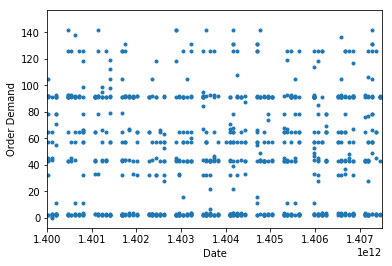

In [12]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
ax.scatter(df_Product['unixTime'],df_Product['Order_Demand'], marker='.')
plt.xlim(1.40e+12, 1.4075e+12)
ax.set_ylabel('Order Demand');
ax.set_xlabel('Date');

Many data points occur at the same time so I am going to find the average for each time

In [13]:
avgProd=df_Product.groupby('Date', as_index=False).Order_Demand.mean()
dt=avgProd['Date']
dt = pd.DatetimeIndex ( dt ).astype ( np.int64 )/1000000
avgProd['unixTime']=dt
avgProd.head(10)

,Date,Order_Demand,unixTime
0,2012-01-05,50.125000,1.325722e+12
1,2012-01-06,66.500000,1.325808e+12
2,2012-01-10,50.458333,1.326154e+12
3,2012-01-11,43.650000,1.326240e+12
4,2012-01-12,49.941176,1.326326e+12
5,2012-01-13,54.434783,1.326413e+12
6,2012-01-16,50.937500,1.326672e+12
7,2012-01-17,45.250000,1.326758e+12
8,2012-01-18,23.800000,1.326845e+12
9,2012-01-19,42.400000,1.326931e+12


In [14]:
avgProd = avgProd.set_index('Date')

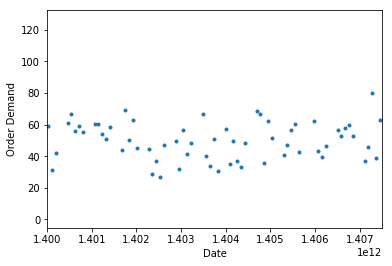

In [15]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
ax.scatter(avgProd['unixTime'],avgProd['Order_Demand'], marker='.')
plt.xlim(1.40e+12, 1.4075e+12)
ax.set_ylabel('Order Demand');
ax.set_xlabel('Date');

Plot looks much cleaner now that a time only has one data point

Text(0,0.5,'Order Demand')

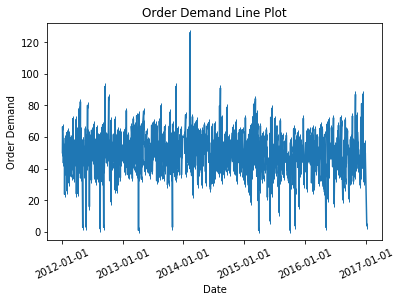

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticklabels(avgProd.index.values, rotation=25)
ax.plot_date(x=avgProd.index.values, y=avgProd.Order_Demand, ls='-', marker='|')
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.title("Order Demand Line Plot")
plt.xlabel("Date")
plt.ylabel("Order Demand")

Text(0,0.5,'Frequency')

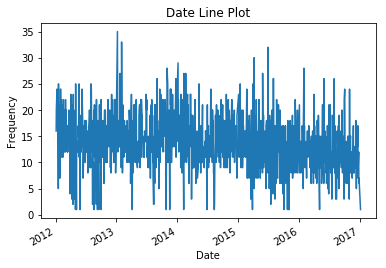

In [18]:
df_Product['Date'].value_counts().sort_values().plot.line()
plt.title("Date Line Plot")
plt.xlabel("Date")
plt.ylabel("Frequency")

## Autocorrelation Plot

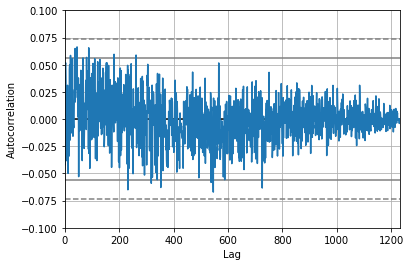

In [38]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(avgProd['Order_Demand'])
plt.ylim(-.1,.1)
plt.show()


## Seasonal Decompose

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = pd.Series(avgProd['Order_Demand'])
result = seasonal_decompose(series, model='multiplicative', freq=100)

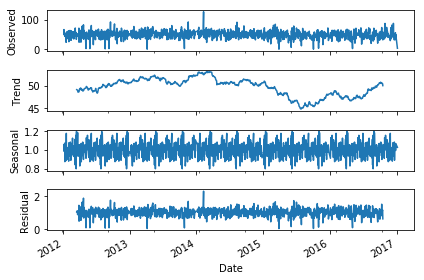

In [32]:
result.plot()
plt.show()

## Smoothing Plot:

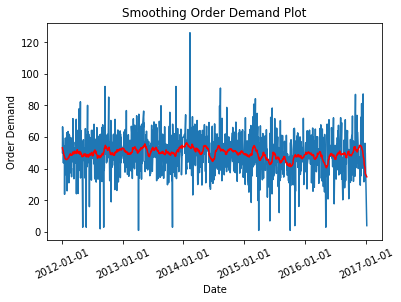

In [37]:
from scipy.signal import savgol_filter

fig = plt.figure()
ax= fig.add_subplot(1,1,1)
x=avgProd.index.values
y=avgProd['Order_Demand']
yhat = savgol_filter(y, 51, 3)

ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks( rotation=25 )
ax.set_ylabel('Order Demand');
ax.set_xlabel('Date');
plt.title("Smoothing Order Demand Plot")

plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
labels = df_Product['Order_Demand']
features = df_Product[['year' , 'month', 'Code', 'day', 'WarehouseLE', 'CategoryLE']]
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.20, 
                                                    random_state=42)

# Gradient Boosting:

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
model = GBR.fit(X_train, y_train.values.ravel())
prediction = model.predict(X_test)
print(GBR.score(X_test, y_test))

-0.004289705894206408


# Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
model = RFR.fit(X_train, y_train.values.ravel())
prediction = model.predict(X_test)
print(RFR.score(X_test, y_test))

-0.11752945764840805


C:\Users\Sandy\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/